In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
df=pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')
print(df.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [9]:
print(df.columns)
print(df.info())

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albu

In [10]:
#Step 1: Load and Prepare a Dataset for Binary Classification

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()

# Use only first 2 features for 2D visualization (optional)
X = data.data[:, :2]  # 2 features for plotting decision boundaries
y = data.target       # Binary target (0 = malignant, 1 = benign)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the feature values (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data ready for training
print("Data Loaded and Scaled Successfully")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Data Loaded and Scaled Successfully
Training set shape: (455, 2)
Testing set shape: (114, 2)


In [11]:
#step:2 train and SVM with linear and RBF Kernel
from sklearn.svm import SVC

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', C=1.0)  # C is a regularization parameter
svm_linear.fit(X_train, y_train)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma controls shape of decision boundary
svm_rbf.fit(X_train, y_train)

# Training done
print("SVM with Linear and RBF kernels trained successful")
print("Linear Kernel Accuracy (train):", svm_linear.score(X_train, y_train))
print("RBF Kernel Accuracy (train):", svm_rbf.score(X_train, y_train))

SVM with Linear and RBF kernels trained successful
Linear Kernel Accuracy (train): 0.8857142857142857
RBF Kernel Accuracy (train): 0.9142857142857143


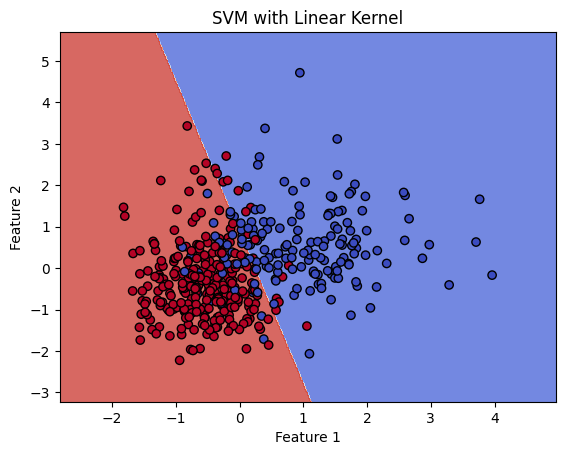

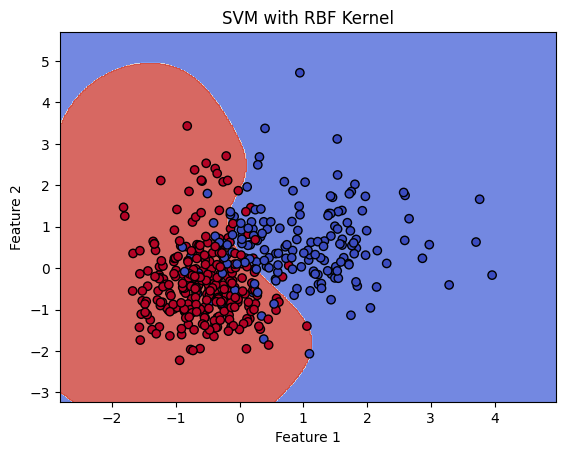

In [12]:
# Step 3: Visualize Decision Boundary Using 2D Data

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training data
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot for Linear Kernel SVM
plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")

# Plot for RBF Kernel SVM
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")

In [13]:
# Step 4: Tune Hyperparameters C and gamma (for RBF kernel)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid for RBF SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Setup GridSearchCV
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

# Show best parameters
print("Best Parameters found by GridSearch:")
print(grid.best_params_)

# Use best model for predictions
best_svm_rbf = grid.best_estimator_

# Accuracy on training and test data
print("Training Accuracy:", best_svm_rbf.score(X_train, y_train))
print("Test Accuracy:", best_svm_rbf.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters found by GridSearch:
{'C': 10, 'gamma': 0.1}
Training Accuracy: 0.9098901098901099
Test Accuracy: 0.9122807017543859


In [15]:
#Step 5: Use Cross-Validation to Evaluate SVM Performance
from sklearn.model_selection import cross_val_score
import numpy as np

# Use the best model from GridSearch (RBF kernel)
model = best_svm_rbf  # already tuned

# Perform 5-fold cross-validation on training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print individual scores and average accuracy
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

#Also Evaluate on Test Set

from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.89010989 0.91208791 0.95604396 0.87912088 0.86813187]
Average CV accuracy: 90.11%

Confusion Matrix:
[[38  5]
 [ 5 66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

